In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100

# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalize the images
x_train, x_test = x_train / 255.0, x_test / 255.0


169001437/169001437 [==============================] - 2s 0us/step


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(100, activation='softmax')
    ])
    return model


In [4]:
model = create_model()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test),
                    batch_size=64,
                    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)])


Epoch 1/20
782/782 [==============================] - 82s 101ms/step - loss: 4.2295 - accuracy: 0.0505 - val_loss: 3.8095 - val_accuracy: 0.1136 - lr: 0.0010
Epoch 2/20
782/782 [==============================] - 73s 93ms/step - loss: 3.7528 - accuracy: 0.1163 - val_loss: 3.4184 - val_accuracy: 0.1786 - lr: 0.0010
Epoch 3/20
782/782 [==============================] - 71s 91ms/step - loss: 3.5006 - accuracy: 0.1599 - val_loss: 3.2545 - val_accuracy: 0.2103 - lr: 0.0010
Epoch 4/20
782/782 [==============================] - 70s 90ms/step - loss: 3.3302 - accuracy: 0.1892 - val_loss: 3.0897 - val_accuracy: 0.2501 - lr: 0.0010
Epoch 5/20
782/782 [==============================] - 77s 98ms/step - loss: 3.1977 - accuracy: 0.2166 - val_loss: 2.9715 - val_accuracy: 0.2766 - lr: 0.0010
Epoch 6/20
782/782 [==============================] - 71s 91ms/step - loss: 3.1007 - accuracy: 0.2345 - val_loss: 2.8749 - val_accuracy: 0.2891 - lr: 0.0010
Epoch 7/20
782/782 [==============================] - 71s

In [5]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


313/313 [==============================] - 4s 13ms/step - loss: 2.4238 - accuracy: 0.3776
Test accuracy: 37.76%


In [11]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def create_model(optimizer='adam', learning_rate=0.001):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(100, activation='softmax')
    ])

    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        opt = optimizer

    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {
    'batch_size': [32, 64],
    'epochs': [20],
    'optimizer': ['adam', 'sgd'],
    'learning_rate': [0.001, 0.01]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")


ModuleNotFoundError: No module named 'keras.wrappers'

In [7]:
!pip install keras


In [12]:
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
]

model.fit(x_train, y_train, epochs=20,
          validation_data=(x_test, y_test),
          batch_size=64,
          callbacks=callbacks)



Epoch 1/20
782/782 [==============================] - 76s 97ms/step - loss: 2.3221 - accuracy: 0.3824 - val_loss: 2.3835 - val_accuracy: 0.3878 - lr: 0.0010
Epoch 2/20
782/782 [==============================] - 71s 91ms/step - loss: 2.2970 - accuracy: 0.3861 - val_loss: 2.4286 - val_accuracy: 0.3793 - lr: 0.0010
Epoch 3/20
782/782 [==============================] - 73s 93ms/step - loss: 2.2773 - accuracy: 0.3894 - val_loss: 2.4074 - val_accuracy: 0.3856 - lr: 0.0010
Epoch 4/20
782/782 [==============================] - 72s 93ms/step - loss: 2.2452 - accuracy: 0.3946 - val_loss: 2.4246 - val_accuracy: 0.3852 - lr: 0.0010
Epoch 5/20
782/782 [==============================] - 74s 95ms/step - loss: 2.2271 - accuracy: 0.3982 - val_loss: 2.4528 - val_accuracy: 0.3786 - lr: 0.0010
Epoch 6/20
216/782 [=======>......................] - ETA: 46s - loss: 2.1750 - accuracy: 0.4120

KeyboardInterrupt: 

313/313 [==============================] - 13s 42ms/step


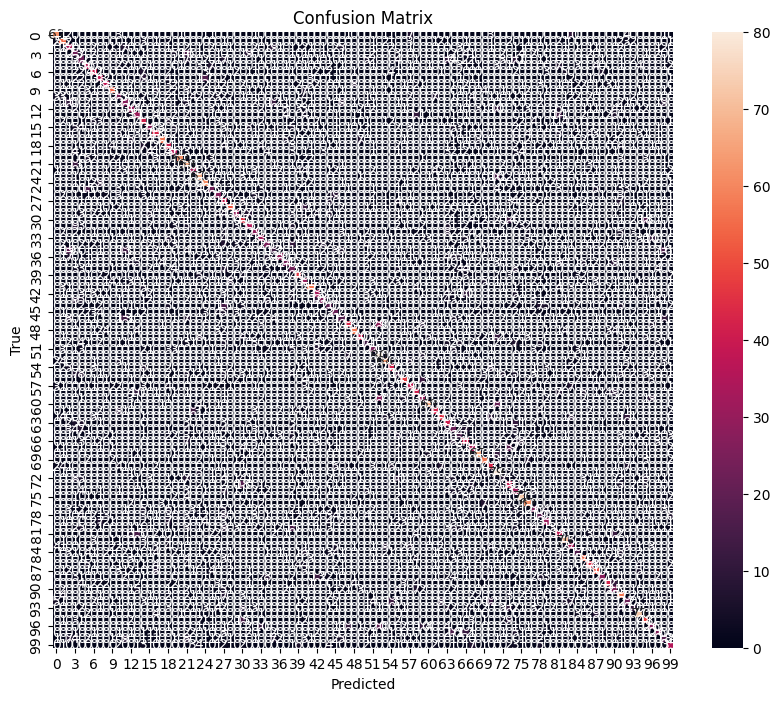

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


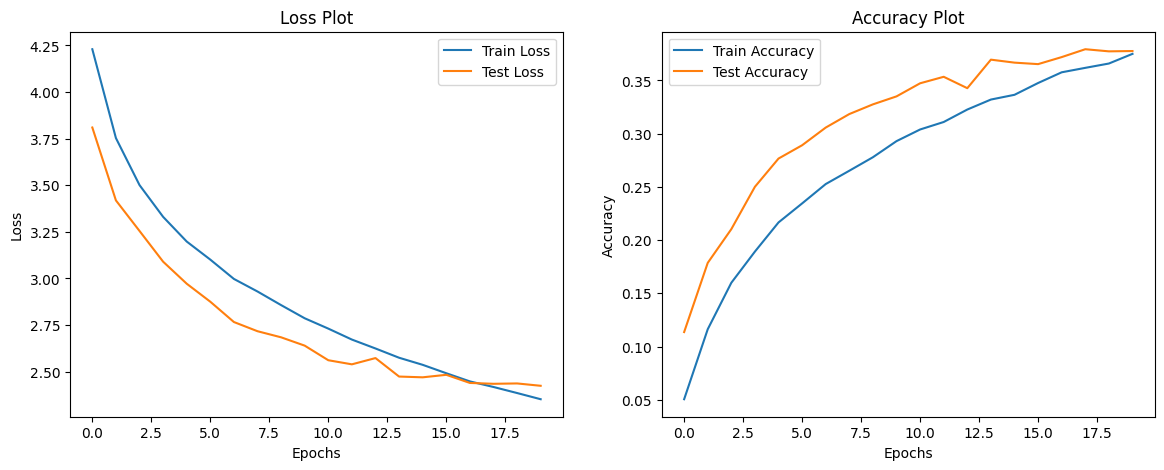

In [15]:
plt.figure(figsize=(14, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


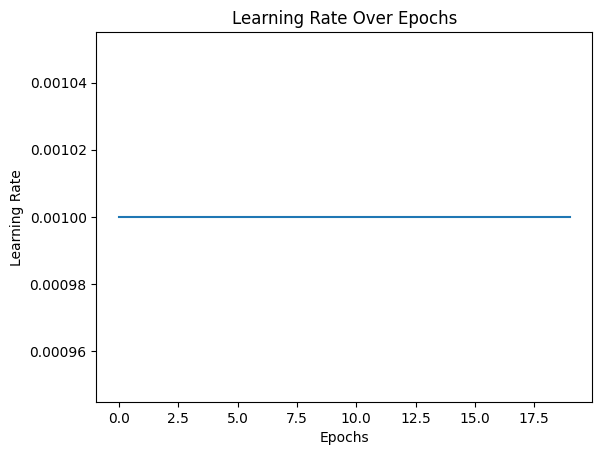

In [16]:
learning_rates = history.history['lr']

plt.figure()
plt.plot(range(len(learning_rates)), learning_rates)
plt.title('Learning Rate Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.show()


313/313 [==============================] - 8s 26ms/step


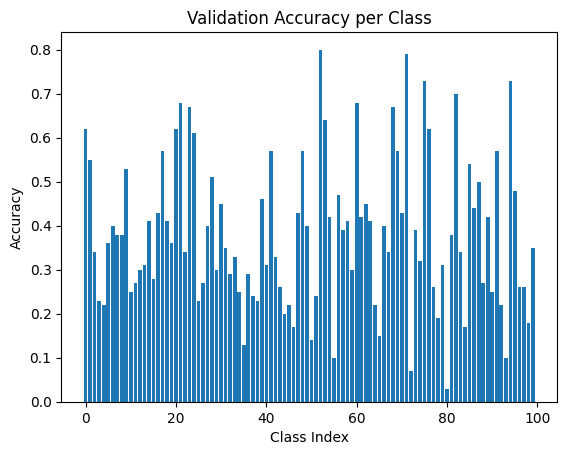

In [17]:
import numpy as np

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

val_accuracy_per_class = []
for i in range(100):
    class_idx = np.where(y_test == i)[0]
    class_accuracy = np.mean(y_pred_classes[class_idx] == y_test[class_idx])
    val_accuracy_per_class.append(class_accuracy)

plt.figure()
plt.bar(range(100), val_accuracy_per_class)
plt.title('Validation Accuracy per Class')
plt.xlabel('Class Index')
plt.ylabel('Accuracy')
plt.show()
